<a href="https://colab.research.google.com/github/kolharsam/6.824-cljlabs-2020/blob/master/sak9791_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1:  Simple linear regression for one independent variable

In this lab, you will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model.  Before doing this lab, you can go through the class demo on simple linear regression for an automobile dataset.  The lab use the Ames Housing dataset which is a commonly used machine learning data set for illustrating basic concepts.  

## Loading the data

The Ames housing data set was collected in 2011 and contains information about home sales in Ames, Iowa, including the sale price and numerical and categorical information about each home. We have constructed a "reduced" version of the dataset that is available at:

https://www.chrismusco.com/machinelearning2024_grad/AmesHousing.csv.

More information about the meaning of each column can be found here: https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf. Note that our version of the dataset contains a subset of the columns in the original dataset and the last column, SalesPrice, is in units of 1000s of US dollars in our version.

In the lab, you will complete all the code marked `TODO`.

First, complete the following code that uses the `pd.read_csv` command to read the data from the file linked above.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://www.chrismusco.com/machinelearning2024_grad/AmesHousing.csv')

Display the first six rows of the data frame

In [2]:
df.head(6)

,Lot Area,Year Built,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,SalePrice
0,31770,1960,441.0,1080.0,1656,0,1656,1,0,3,7,2,2.0,528.0,215.0
1,11622,1961,270.0,882.0,896,0,896,1,0,2,5,0,1.0,730.0,105.0
2,14267,1958,406.0,1329.0,1329,0,1329,1,1,3,6,0,1.0,312.0,172.0
3,11160,1968,1045.0,2110.0,2110,0,2110,2,1,3,8,2,2.0,522.0,244.0
4,13830,1997,137.0,928.0,928,701,1629,2,1,3,6,1,2.0,482.0,189.9
5,9978,1998,324.0,926.0,926,678,1604,2,1,3,7,1,2.0,470.0,195.5


## Basic Manipulations on the Data

What is the shape of the data?  How many attributes are there?  How many samples?
Print a statement of the form:

    num samples=xxx, num attributes=yy

In [6]:
# TODO
samples = df.values
attris = df.columns.tolist()
print("num samples = ",len(samples), ", num attributes = ", len(attris)-1)
df.shape

num samples =  2930 , num attributes =  14


(2930, 15)

The dataset contains some NaN value. Before proceeding, drop all rows from the dataframe with NaN values. There should only be a few.

In [7]:
# TODO
df = df.dropna()
df.shape

(2928, 15)

Create a response vector `y` with the values in the column `SalePrice`.  The vector `y` should be a 1D `numpy.ndarray` structure.

In [8]:
# TODO
# y = ...
y = df['SalePrice'].values
y.shape


(2928,)

Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $120k. Print and label your results.

In [11]:
# TODO
mean_y = np.mean(y)
print(mean_y)
print(np.mean(y>120) * 100)

180.84103381147543
81.69398907103826


## Visualizing the Data

Load the `matplotlib` package with the following commands.

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, create a predictor vector `x` containing the values in the `TotRms AbvGrd` column, which represents the total number of non-basement rooms in the home.

In [14]:
# TODO
# x = ...
x = df['TotRms AbvGrd'].values

Create a scatter plot of the price vs. the `TotRms AbvGrd` attribute.  Label the axes with reasonable labels so that someone else can understand the plot.

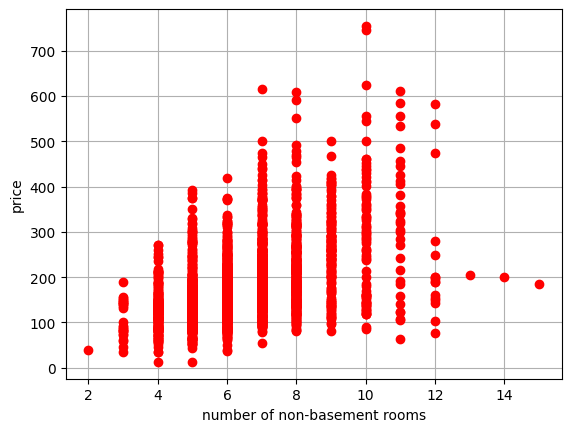

In [21]:
# TODO
plt.plot(x,y,'ro')
plt.xlabel('number of non-basement rooms')
plt.ylabel('price')
plt.grid(True)

## Fitting a Simple Linear Model

We will write a simple function to perform a linear fit under the squared loss function. Use the formulae given in the class to compute the optimal parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x$$ as well as the optimal loss $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$.

In [23]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       y = beta0 + beta1*x,
    The function returns beta0, beta1, and loss, where loss is the sum-of-squares loss of.
    """
    # TODO complete the following code

    # beta0 = ...
    # beta1 = ...
    # loss = ...
    xm = np.mean(x)
    ym = np.mean(y)
    sxx = np.mean((x-xm)**2)
    syy = np.mean((y-ym)**2)
    sxy = np.mean((x-xm)*(y-ym))

    beta1 = sxy / sxx
    beta0 = ym - beta1 * xm
    ypred = beta0 + beta1 * x
    loss = np.sum((y-ypred)**2)

    return beta0, beta1, loss

Using the function `fit_linear` above, print the values `beta0`, `beta1` and `loss` for the linear model of price vs. number of rooms.

In [24]:
# TODO

beta0, beta1, loss = fit_linear(x,y)
print("beta0, beta1, loss = ", beta0, beta1, loss)

beta0, beta1, loss =  18.78067695087961 25.149073822759412 14101634.9287433


Replot the scatter plot above, but now with the regression line.  You can create the regression line by creating points `yp` that are the predicted values for each value in `x`, according to our linear model. Plot as a line, not a scatter plot.

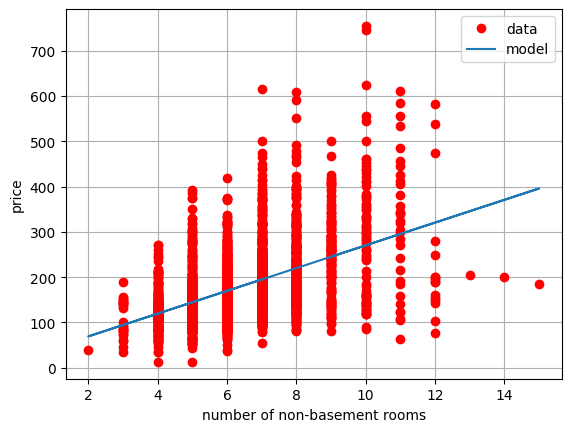

In [31]:
# TODO

ypred = beta0 + beta1 * x
plt.plot(x,y,'ro')
plt.plot(x,ypred,'-')
plt.xlabel('number of non-basement rooms')
plt.ylabel('price')
plt.grid(True)
plt.legend(['data', 'model'])

# Part 2:  Compare different dependent variables


We next compute the squared loss for all the predictors and output the values in a table. Your table should look like the following, where each entry in the first column is the attribute name and the second column is the squared loss.

    Lot Area           XXXXX
    Overall Qual       XXXXX
    Overall Cond       XXXXX
    ...         ...

You will need to write a loop to perform this task.

What variable does the best job predicting house price?

In [39]:
# TODO

attris = df.columns.tolist()
attris = attris[:14]
losses = [[]]
loss_max = float('inf')
#print(attributes)
for att in attris:
  x = df[att].values
  beta0, beta1, loss = fit_linear(x,y)
  if loss_max > loss:
    best_attr = att
    loss_max = loss
  print(att+"\t\t"+ str(loss/1000))

print("attribute with best loss is: ", best_attr+ "\t\t"+ str(loss_max/1000) )

Lot Area		17355.5521289748
Year Built		12857.59752108994
Bsmt Unf SF		18057.043352683388
Total Bsmt SF		11213.377809485033
1st Flr SF		11463.53845835845
2nd Flr SF		17325.63537166565
Gr Liv Area		9349.29271352037
Full Bath		13120.702490637925
Half Bath		17166.31515412032
Bedroom AbvGr		18296.281042272018
TotRms AbvGrd		14101.634928743299
Fireplaces		14478.395125792358
Garage Cars		10843.47326989586
Garage Area		11022.825044525307
attribute with best loss is:  Gr Liv Area		9349.29271352037


**TODO:** Describe in words the meaning of

---

the most predictive variable for housing price.



> Above grade (ground) living area square feet has the best loss because the more living space, the higher the price of the house.



# Part 3:  Compare different loss functions

## A Brute force algorithm for squared loss

Your code in `fit_linear` relies on the closed form expressions for the optimal $\beta_0$ and $\beta_1$, which we derived in class. However, if you did not know these formulas, you could have approximately minimized the loss function by brute force searching over a grid of possible values for $\beta_0$ and $\beta_1$.

For example, we could try out all combinations of parameters where $\beta_0$ is in `np.arange(-50,50,.1)` and $\beta_1$ is in `np.arange(-1,1,.005)`

Write a function which takes this approach to find a $\beta_0$ and $\beta_1$ which approximately minimize the squared loss: $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$

In [49]:
def fit_approx(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the sum-of-squares loss. The min_loss returned is the lost of the best beta0 and beta1 you found.
    """
    # TODO complete the following code
    # beta0 = ...
    # beta1 = ...
    # min_loss = ...

    min_loss = np.infty
    beta0 = 0
    beta1 = 0
    for b0 in np.arange(0,50,0.1):
      for b1 in np.arange(-1,1,0.005):
          loss = np.sum((y-(b0+b1*x))**2)
          if loss < min_loss:
            beta0 = b0
            beta1 = b1
            min_loss = loss

    return beta0, beta1, min_loss

Compare the output of `fit_approx` and `fit_linear` with `y` being `SalePrice` and `x` being the `Gr Liv Area` variable from our dataset. You should do so:
* quantitatively, by printing the loss that each approach achieves
* and visually, by plotting the different fit lines obtained.

In [43]:
x = df['Gr Liv Area'].values
beta0approx, beta1approx, loss = fit_approx(x,y)
print(beta0approx, beta1approx, loss)

15.9 0.11000000000000099 9351446.560112998


In [44]:
beta0, beta1, loss = fit_linear(x,y)
print(beta0, beta1, loss)

13.321908483817452 0.11169546420703488 9349292.71352037


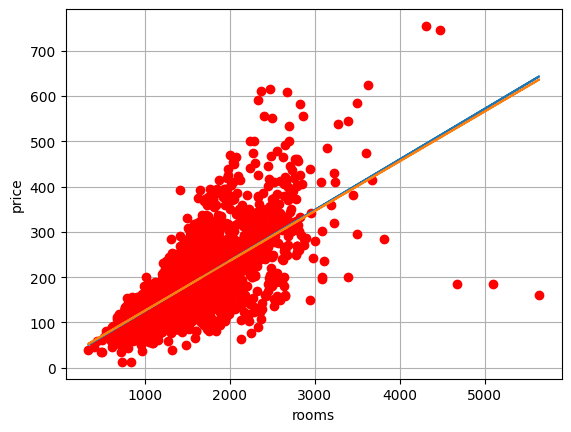

In [45]:
plt.plot(x,y,'ro')
plt.xlabel('rooms')
plt.ylabel('price')
plt.grid(True)

plt.plot(x,beta1*x + beta0)
plt.plot(x,beta1approx*x + beta0approx)

## Extending to different loss functions

One benefit of the above approach is that is easily extends to different loss funtions. Write functions which find an approximately optimal $\beta_0$ and $\beta_1$ for
* minimizing the $\ell_1$ (least absolute deviations) loss: $\sum_{i=1}^n |y_i - \beta_0 - \beta_1 x|$
* minimizing the $\ell_\infty$ (max) loss: $\max_i |y_i - \beta_0 - \beta_1 x|$


In [42]:
def fit_approx_l1(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the least absolute deviations loss.
    """

    # TODO complete the following code
    # beta0 = ...
    # beta1 = ...
    # min_loss = ...

    min_loss = np.infty
    beta0 = 0
    beta1 = 0
    for b0 in np.arange(0,50,0.1):
      for b1 in np.arange(-1,1,0.005):
          loss = np.sum(np.abs(y-(b0+b1*x)))
          if loss < min_loss:
            beta0 = b0
            beta1 = b1
            min_loss = loss

    return beta0, beta1, min_loss

In [46]:
def fit_approx_max(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the max loss.
    """
    # TODO complete the following code
    # beta0 = ...
    # beta1 = ...
    # min_loss = ...

    min_loss = np.infty
    beta0 = 0
    beta1 = 0
    for b0 in np.arange(0,50,0.1):
      for b1 in np.arange(-1,1,0.005):
          loss = np.max(np.abs(y-(b0+b1*x)))
          if loss < min_loss:
            beta0 = b0
            beta1 = b1
            min_loss = loss

    return beta0, beta1, min_loss

**TODO:** Use your algorithm to obtain 3 different linear fits for `SalePrice` with predictor variable `Gr Liv Area`, one for squared loss, one for $\ell_1$ loss, and one for $\ell_\infty$ loss. Plot the linear fits (along with the data scatter plot) on a single figure and use a legend to indicate which fit corresponds to which loss.

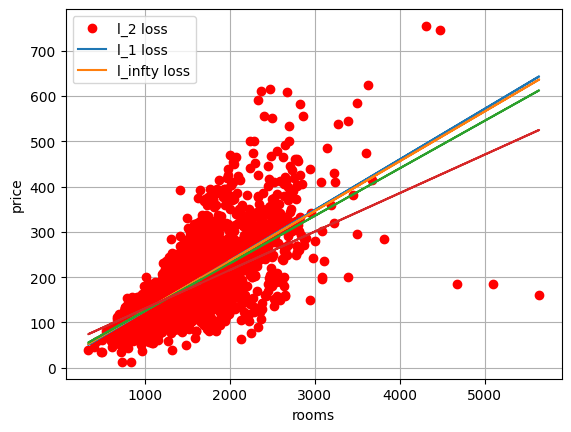

In [47]:
x = df['Gr Liv Area'].values
beta0approx_l2, beta1approx_l2, loss_l2 = fit_approx(x,y)
beta0approx_l1, beta1approx_l1, loss_l1 = fit_approx_l1(x,y)
beta0approx_linfy, beta1approx_linfy, loss_linfy = fit_approx_max(x,y)

plt.plot(x,y,'ro')
plt.xlabel('rooms')
plt.ylabel('price')
plt.grid(True)

plt.plot(x,beta1*x + beta0)
plt.plot(x,beta1approx_l2 * x + beta0approx_l2)
plt.plot(x,beta1approx_l1 * x + beta0approx_l1)
plt.plot(x,beta1approx_linfy * x + beta0approx_linfy)
plt.legend(['l_2 loss','l_1 loss','l_infty loss'])

**TODO:** Repeat the process above for the `Lot Area` predictor variable, which has some more extreme outliers. Note that  this variable has a different scale than `Gr Liv Area` so you might need to adjust your approximate fit functions accordingly.

Again produce a plot that contains three different linear fits for all three different loss functions. Write 1-2 sentences of discussion about how the choice of loss function effected the fit.

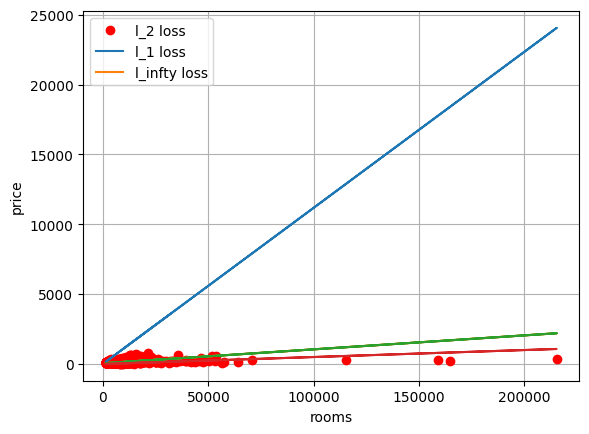

In [48]:
x = df['Lot Area'].values
beta0approx_l2, beta1approx_l2, loss_l2 = fit_approx(x,y)
beta0approx_l1, beta1approx_l1, loss_l1 = fit_approx_l1(x,y)
beta0approx_linfy, beta1approx_linfy, loss_linfy = fit_approx_max(x,y)

plt.plot(x,y,'ro')
plt.xlabel('rooms')
plt.ylabel('price')
plt.grid(True)

plt.plot(x,beta1*x + beta0)
plt.plot(x,beta1approx_l2 * x + beta0approx_l2)
plt.plot(x,beta1approx_l1 * x + beta0approx_l1)
plt.plot(x,beta1approx_linfy * x + beta0approx_linfy)
plt.legend(['l_2 loss','l_1 loss','l_infty loss'])